In [1]:
!python setup.py build_ext --inplace

Compiling ER.pyx because it changed.
[1/1] Cythonizing ER.pyx
running build_ext
building 'ER' extension
arm64-apple-darwin20.0.0-clang -Wno-unused-result -Wsign-compare -Wunreachable-code -DNDEBUG -fwrapv -O2 -Wall -fPIC -O2 -isystem /opt/miniconda3/envs/genomic/include -arch arm64 -fPIC -O2 -isystem /opt/miniconda3/envs/genomic/include -arch arm64 -ftree-vectorize -fPIC -fPIE -fstack-protector-strong -O2 -pipe -isystem /opt/miniconda3/envs/genomic/include -D_FORTIFY_SOURCE=2 -isystem /opt/miniconda3/envs/genomic/include -DNPY_NO_DEPRECATED_API=NPY_1_7_API_VERSION -I/opt/miniconda3/envs/genomic/lib/python3.10/site-packages/numpy/core/include -I/opt/miniconda3/envs/genomic/include/python3.10 -c ER.cpp -o build/temp.macosx-11.0-arm64-3.10/ER.o -std=c++11
arm64-apple-darwin20.0.0-clang++ -bundle -undefined dynamic_lookup -Wl,-rpath,/opt/miniconda3/envs/genomic/lib -L/opt/miniconda3/envs/genomic/lib -Wl,-rpath,/opt/miniconda3/envs/genomic/lib -L/opt/miniconda3/envs/genomic/lib -Wl,-pie -Wl

In [1]:
import cython
import pyximport
import numpy as np
import ER
import matplotlib.pyplot as plt
from tqdm import trange
%matplotlib ipympl

In [3]:
a = ER.ER(L=1,
                 lamda=1,
                 u0=0.2,
                 rho=100000,
                 theta=0.1,
                 alpha=1,
                 n_alleles=30,
                   n_epoch=1000)
a.initiate(0.5)
# a.run()

In [5]:
a.run()

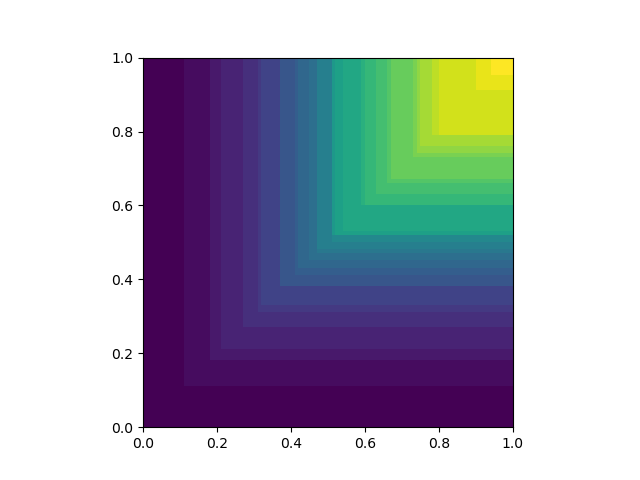

In [6]:
%matplotlib widget
a.plt_SFS2(0.5, 0.25,0.75, 0.18)

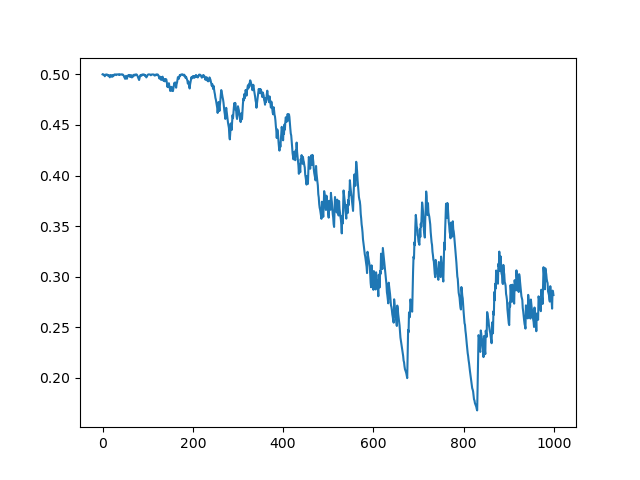

In [9]:
#Heterozigosity
%matplotlib widget
a = ER.ER(L=1,
                 lamda=1,
                 u0=0.3,
                 rho=100000,
                 theta=0.1,
                 alpha=1,
                 n_alleles=2,
                   n_epoch=1000)
a.initiate(0.5)
hets = a.run_with_het()
hets = list(hets)
plt.plot(range(1000), hets[:1000])

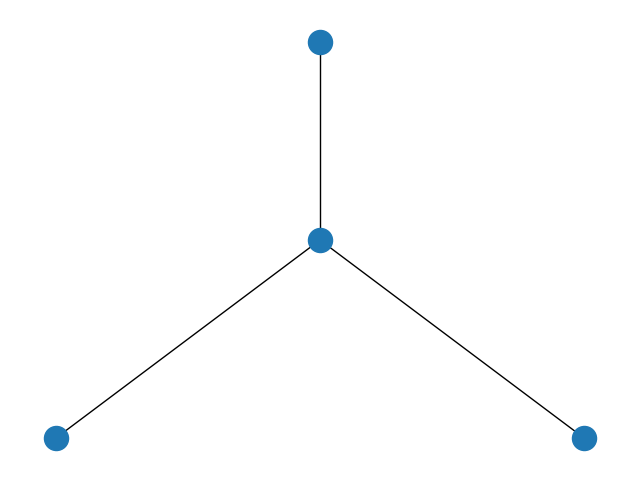

In [11]:
%matplotlib widget
a.build_tree([100, 200, 400])

In [33]:
a = ER.ER(L=1,
                 lamda=1,
                 u0=0.4,
                 rho=1000,
                 theta=0.5,
                 alpha=1,
                 n_alleles=2,
                   n_epoch=100000)

In [34]:
1/a.integral

3.414866223977846

100%|█████████████████████████| 29282432/29282432 [00:02<00:00, 11322617.54it/s]


Mean-time = 3.4191353508628564


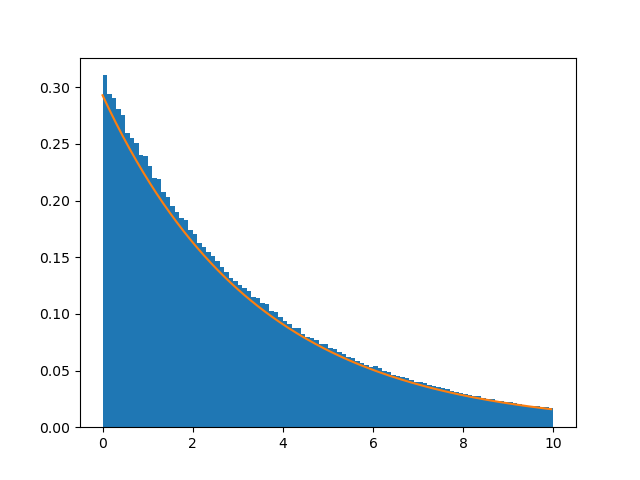

In [35]:
%matplotlib widget


a.initiate(0.5)
a.run()


a.lifetime()
xs = np.arange(0, 10, 0.05)
ys = 1 * a.integral * np.exp( - a.integral * xs)
plt.plot(xs, ys)
plt.show()

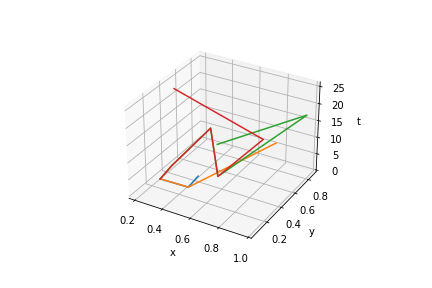

In [49]:
%matplotlib widget

a = ER.ER(L=1,
                 lamda=1,
                 u0=0.4,
                 rho=100,
                 theta=0.5,
                 alpha=1,
                 n_alleles=2,
                   n_epoch=100)


a.initiate(0.5)
a.run()


ls = a.build_lines([200, 205, 405, 505])

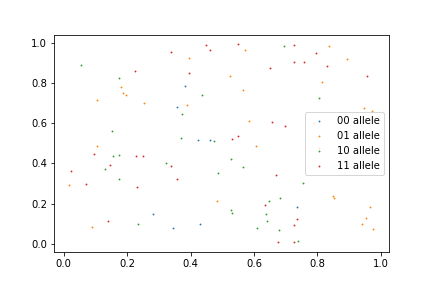

In [61]:
%matplotlib widget

a = ER.ER(L=1,
                 lamda=1,
                 u0=0.4,
                 rho=100,
                 theta=0.1,
                 alpha=1,
                 n_alleles=2,
                   n_epoch=100)


a.initiate(0.5)
a.run()

a.plot_alleles(alpha=0.7)

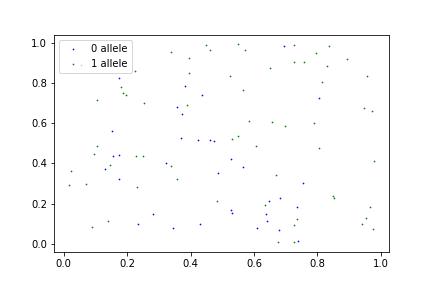

In [62]:
%matplotlib widget
a.plot_with_alleles(1)

In [96]:

def plot_crater(thetas, us):
    for theta in thetas:
        for u0 in us:
            print(f'theta={theta}, u0 = {u0}')
            a = ER.ER(L=1,
                         lamda=1,
                         u0=u0,
                         rho=10000,
                         theta=theta,
                         alpha=1,
                         n_alleles=2,
                           n_epoch=100)
            a.initiate(0.5)
            a.plot_with_alleles(alpha=0.9);
            plt.figure()
            a.propagate(0.6, 0.4, 0.2)
            a.plot_with_alleles(alpha=0.9);

theta=0.1, u0 = 0.9


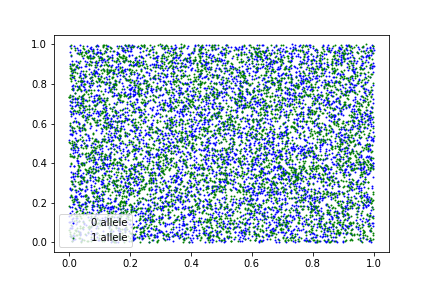

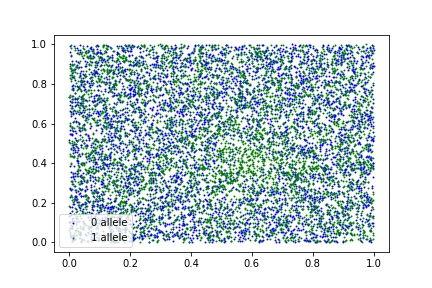

In [97]:
%matplotlib widget
plot_crater([0.1], [0.9])

In [98]:
def plot_het(theta, u0):
    print(f'theta={theta}, u0 = {u0}')
    hets = list()
    for i in trange(100):
        a = ER.ER(L=1,
                     lamda=1,
                     u0=u0,
                     rho=10000,
                     theta=theta,
                     alpha=1,
                     n_alleles=2,
                       n_epoch=1000)
        a.initiate(0.5)
        hets.append(list(a.run_with_het()))
    
    hets = np.mean(np.array(hets), axis=0)
    # print(hets)
    plt.plot(range(1000), hets[:1000])
    # plt.savefig(f"{theta}-{u0}-het.png")
    # plt.clf()

    

theta=0.3, u0 = 0.1


100%|█████████████████████████████████████████| 100/100 [01:44<00:00,  1.05s/it]


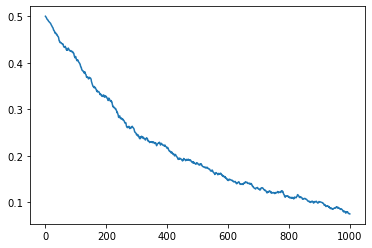

In [99]:
%matplotlib inline
for t in [0.1]:
    for u in [0.3]:
        plot_het(u, t)

In [ ]:
import timeit

In [ ]:
def times(rhos, thetas, us, n_epochs):
    for rho in rhos:
        for theta in thetas:
            for n_epoch in n_epochs:
                for u0 in us:                   
                    code = f'''
import SLFVP
a = SLFVP.SLFVP(L=1,
             lamda=1,
             u0={u0},
             rho={rho},
             theta={theta},
             alpha=1,
             n_alleles=2,
               n_epoch={n_epoch})
a.initiate(0.5)
a.run()
                    '''
                    elapsed_time = timeit.timeit(code, number=3)/3
                    print(f"{rho}\t{u0}\t{theta}\t{n_epoch}\t{elapsed_time}")
                    